<a href="https://colab.research.google.com/github/ryxGuo/BVOC/blob/main/ACOcams_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install netCDF4
!pip install  basemap
!pip install cartopy
!pip install rioxarray
!pip install rasterio
!pip install earthpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 20.7 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 81.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 899.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 47.8 MB/s eta 0:00:00


In [ ]:
from netCDF4 import Dataset as NetCDFFile
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
import xarray as xr

%matplotlib inline
from matplotlib import animation
import cartopy.crs as ccrs
from IPython.display import HTML

import rioxarray as rxr
from rasterio.warp import transform_bounds
import rasterio as rio
from rasterio.plot import show

import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es

In [ ]:
#Start by connecting gdrive into the google colab - make sure to connect to your colby account
#log in and allow access - this means we can read & Save data to google drive.
from google.colab import drive

drive.mount("/content/gdrive/", force_remount=True)

Mounted at /content/gdrive/


In [ ]:
#now let's import python libraries
import numpy as np
import pandas as pd
from osgeo import osr, ogr, gdal #we could try geopandas
import geopandas as gpd #using
from shapely.geometry import Polygon, shape, MultiPolygon

from skimage import morphology #if we wnated to play a bit more with how water bodies are identified
from skimage.measure import label, regionprops_table, find_contours#, points_in_poly, regionprops_table


In [ ]:
%cd /content/gdrive/MyDrive/Plot_SatEmissions
%ls

/content/gdrive/.shortcut-targets-by-id/197M9AVQOZWkRjG9UX45m0FLV5U7RmRQp/Plot_SatEmissions
CAMS-GLOB-BIO_Glb_0.25x0.25_bio_isoprene_v3.1_monthly_2022.nc
CAMS-GLOB-BIO_Glb_0.25x0.25_bio_isoprene_v3.1_monthly_2022.tif
cams_plot.ipynb
Manaus_Oct27_2_psscene_analytic_sr_udm2/
Manaus_Oct27_2_psscene_analytic_sr_udm2.zip
Manaus_Oct27_3_psscene_visual/
Manaus_Oct27_3_psscene_visual.zip
Manaus_Oct27_psscene_analytic_8b_sr_udm2/
Manaus_Oct27_psscene_analytic_8b_sr_udm2.zip
manaus_oct27_rgb_psscene_visual/
manaus_oct27_rgb_psscene_visual.zip


In [ ]:


# # 8 bands
# satellite = rxr.open_rasterio("data/Manaus Oct27_psscene_analytic_8b_sr_udm2/composite.tif")
# satellite

### Read the data

In [ ]:
fn = 'CAMS-GLOB-BIO_Glb_0.25x0.25_bio_isoprene_v3.1_monthly_2022.nc'
ds = xr.open_dataset(fn, decode_times=True, decode_coords="all")
dsa = ds.rio.write_crs('EPSG:4326')

In [ ]:
dsaa = dsa['emiss_bio']
dsaa

<xarray.DataArray 'emiss_bio' (time: 12, lat: 720, lon: 1440)>
[12441600 values with dtype=float32]
Coordinates:
  * time         (time) datetime64[ns] 2022-01-01 2022-02-01 ... 2022-12-01
  * lat          (lat) float32 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75
  * lon          (lon) float32 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
    spatial_ref  int64 0
Attributes:
    standard_name:           tendency_of_atmosphere_mass_content_of_isoprene_...
    sector_name:             Biogenic
    molecular_weight:        68.0
    molecular_weight_units:  g mole-1
    cell_methods:            TSTEP: mean time: mean
    long_name:               isoprene        
    units:                   kg m-2 s-1

## Plot the data

In [ ]:
dsaa2 = dsaa.where(dsaa > 0)
dsaa2

<xarray.DataArray 'emiss_bio' (time: 12, lat: 720, lon: 1440)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time         (time) datetime64[ns] 2022-01-01 2022-02-01 ... 2022-12-01
  * lat          (lat) float32 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75
  * lon          (lon) float32 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
    spatial_ref  int64 0
Attributes:
    standard_name:           tendency_of_atmosphere_mass_content_of_isoprene_...
    sector_name:             Biogenic
    molecular_weight:        68.0
    molecular_weight_units:  g mole-1
    cell_methods:            TSTEP: mean time: mean
    long_name:               isoprene        
    units:                   kg m-2 s-1

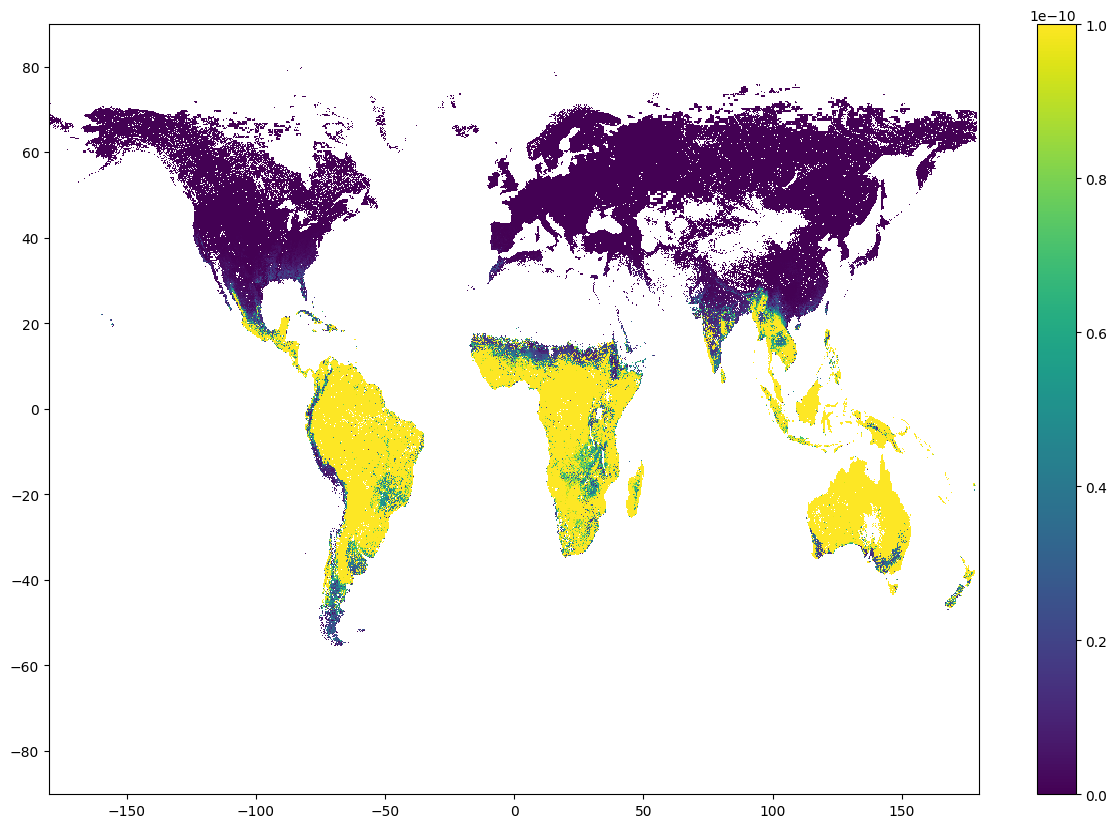

In [ ]:
# create the figure panel and specify size
fig, ax = plt.subplots(figsize=(15, 10))


# Plot the data
im = plt.pcolormesh(dsaa2.lon, dsaa2.lat, dsaa2[0,:,:],vmax=1e-10)
plt.colorbar(im)

<xarray.DataArray 'emiss_bio' ()>
array(1.7083493e-11, dtype=float32)
Coordinates:
    time         datetime64[ns] 2022-11-01
    spatial_ref  int64 0

### Plot Emissions

### Plot satellite

In [ ]:
# rgb
rgb = rxr.open_rasterio("manaus_oct27_rgb_psscene_visual/composite.tif")
rgb.shape

(4, 1035, 1367)

In [ ]:
rgb_fp = r'Manaus_Oct27_2_psscene_analytic_sr_udm2/composite.tif'
rgb_manaus = rio.open(rgb_fp)
rgb_manaus2 = rgb_manaus.read()
type(rgb_manaus2)
# fig, ax = plt.subplots(2,2)
# ax[0][0]
# ax[0,0].imshow(rgb_manaus,vmin=0,vmax=255)
# ax[0,1].imshow(rgb_manaus,vmin=0,vmax=255)
# ax[1,0].imshow(rgb_manaus,vmin=0,vmax=255)
# ax[1,1].imshow(rgb_manaus,vmin=0,vmax=255)
# ax[0][0]
# ax[0,0].imshow(rgb.isel(band=0),vmin=0,vmax=255)
# ax[0,1].imshow(rgb.isel(band=1),vmin=0,vmax=255)
# ax[1,0].imshow(rgb.isel(band=2),vmin=0,vmax=255)
# ax[1,1].imshow(rgb.isel(band=3),vmin=0,vmax=255)

numpy.ndarray

In [ ]:
dfile = None
dfile = gdal.Open('Manaus_Oct27_psscene_analytic_8b_sr_udm2/composite.tif')

#create an array for each band of the image
cb = dfile.GetRasterBand(1).ReadAsArray() #gdal indexes from 1
b = dfile.GetRasterBand(2).ReadAsArray()
g = dfile.GetRasterBand(3).ReadAsArray()
g2 = dfile.GetRasterBand(4).ReadAsArray()
y = dfile.GetRasterBand(5).ReadAsArray()
r = dfile.GetRasterBand(6).ReadAsArray()
re = dfile.GetRasterBand(7).ReadAsArray()
nir = dfile.GetRasterBand(8).ReadAsArray()

dd = {'coastal blue':cb, 'blue':b,'green I': g,
      'green II': g2, 'yellow': y, 'red':r, 'red edge':re,
      'near infrared': nir}

In [ ]:
dfile = None
dfile = gdal.Open('Manaus_Oct27_2_psscene_analytic_sr_udm2/composite.tif')

#create an array for each band of the image
b = dfile.GetRasterBand(1).ReadAsArray() #gdal indexes from 1
g = dfile.GetRasterBand(2).ReadAsArray()
r = dfile.GetRasterBand(3).ReadAsArray()
nir = dfile.GetRasterBand(4).ReadAsArray()


dd4 = {'blue':b,'green': g,
      'red':r, 'near infrared': nir}

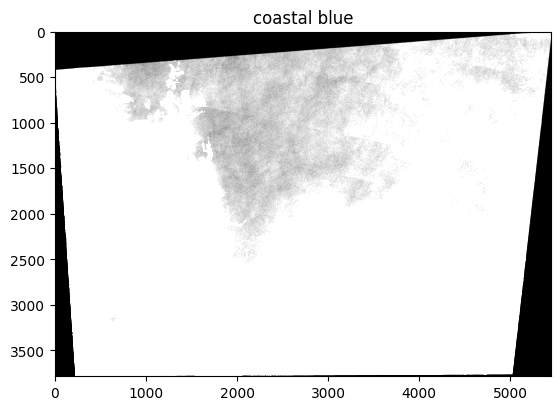

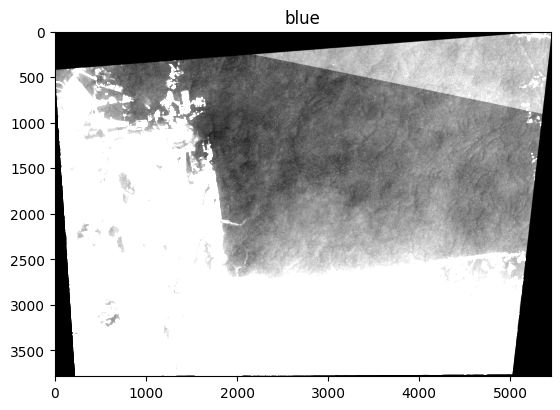

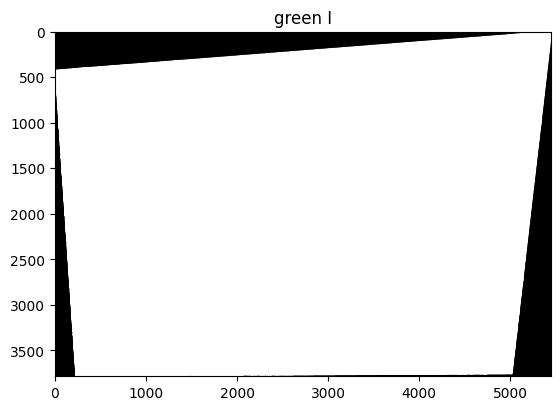

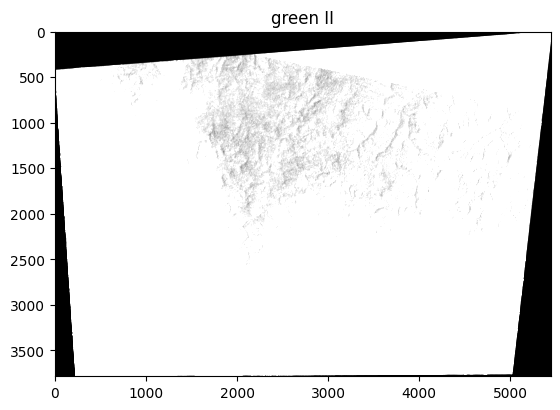

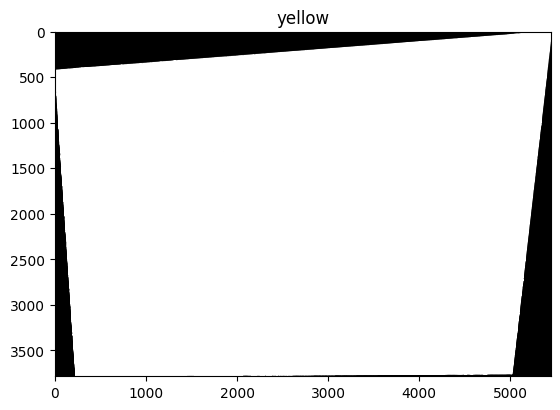

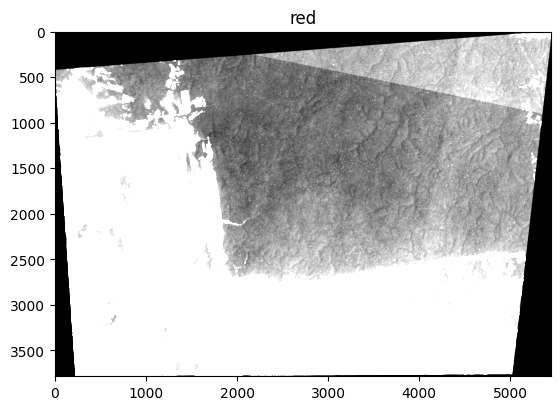

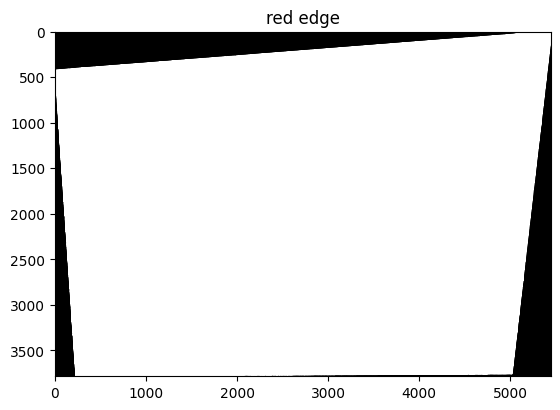

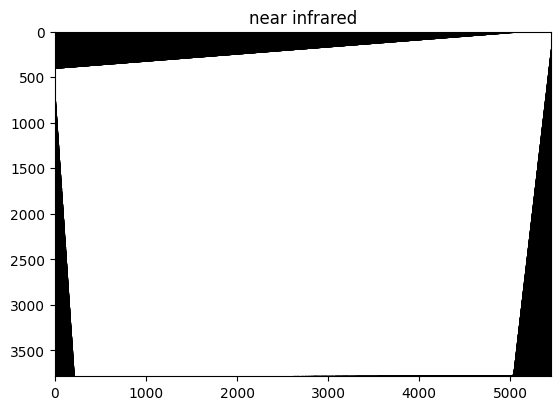

In [ ]:
for i, k in enumerate(dd):
  plt.figure()
  plt.imshow(dd[k],cmap='gray',vmin=0,vmax=255)
  plt.title(k)

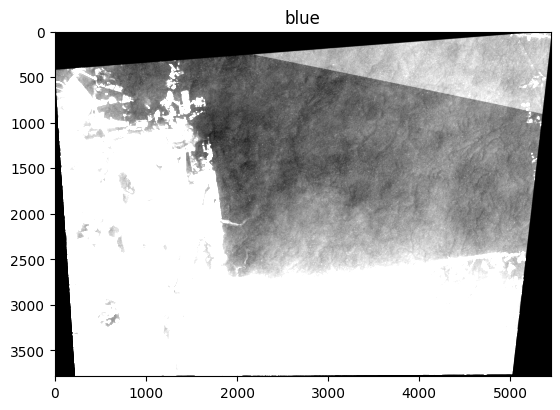

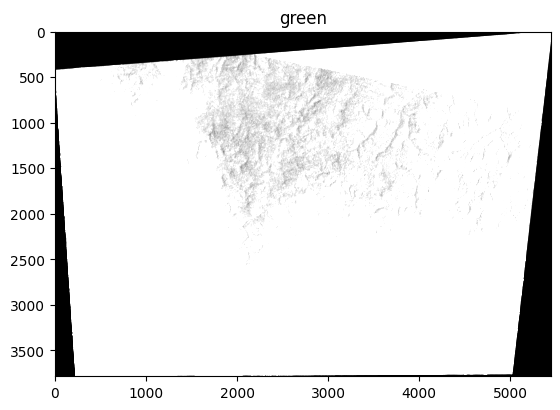

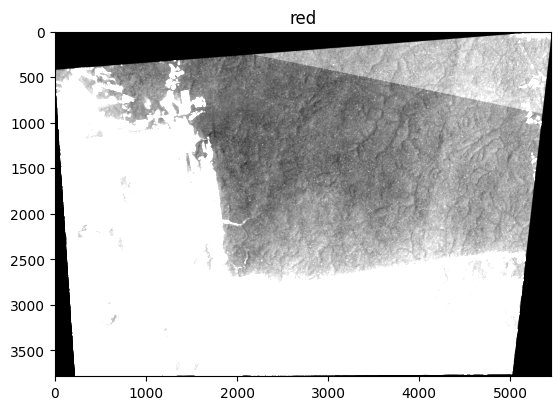

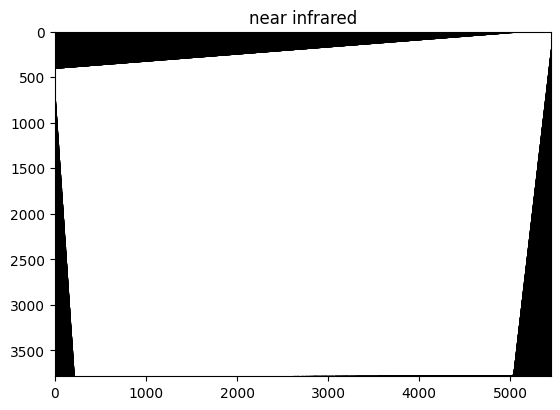

In [ ]:
for i, k in enumerate(dd4):
  plt.figure()
  plt.imshow(dd4[k],cmap='gray',vmin=0,vmax=255)
  plt.title(k)

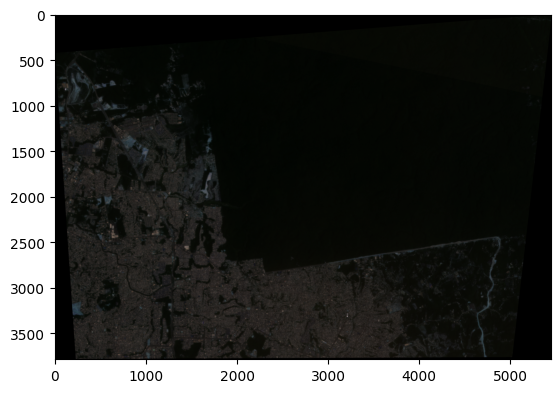

In [ ]:
im = np.dstack((dd4['blue']/dd4['blue'].max(),dd4['green']/dd4['green'].max(),dd4['red']/dd4['red'].max()))
plt.imshow(im)
# plt.imshow(dd['near infrared'])

In [ ]:
dd4['red'].max()

12740

In [ ]:
dfile = None
dfile = gdal.Open('Manaus_Oct27_3_psscene_visual/composite.tif')

#create an array for each band of the image
b = dfile.GetRasterBand(1).ReadAsArray() #gdal indexes from 1
g = dfile.GetRasterBand(2).ReadAsArray()
r = dfile.GetRasterBand(3).ReadAsArray()
nir = dfile.GetRasterBand(4).ReadAsArray()


ddrgb = {'blue':b,'green': g,
      'red':r, 'near infrared': nir}

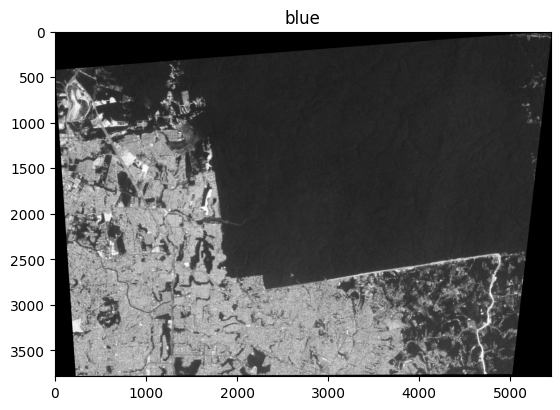

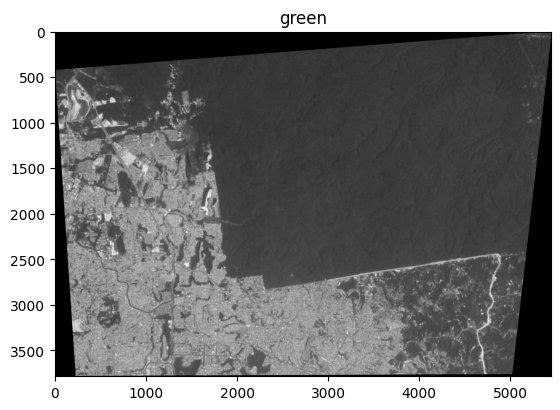

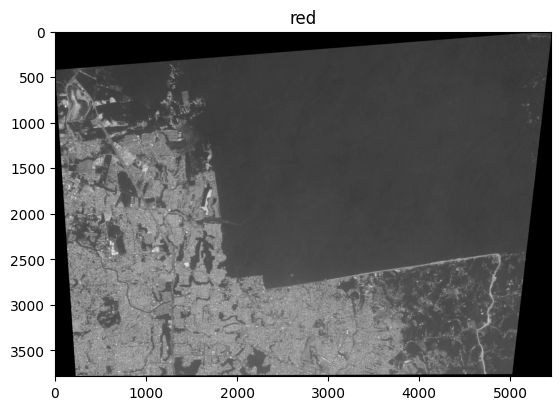

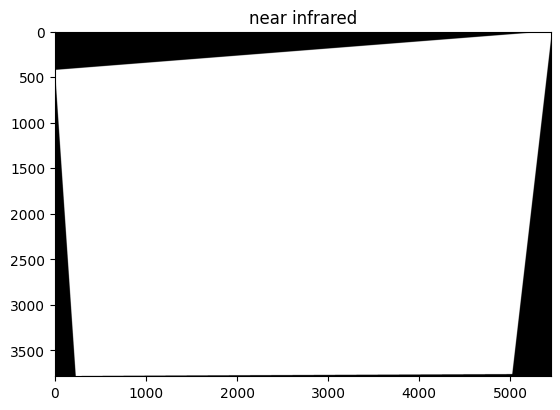

In [ ]:
for i, k in enumerate(ddrgb):
  plt.figure()
  plt.imshow(ddrgb[k],cmap='gray',vmin=0,vmax=255)
  plt.title(k)

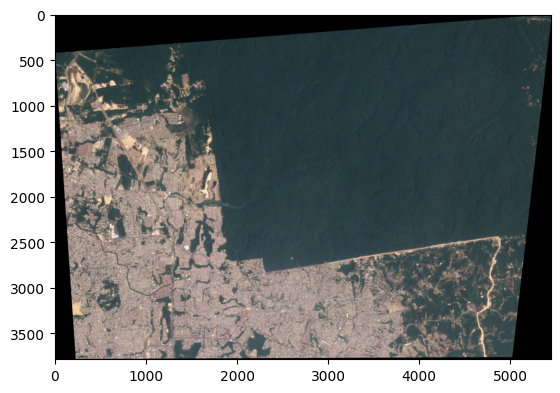

In [ ]:
im = np.dstack((ddrgb['blue']/ddrgb['blue'].max(),ddrgb['green']/ddrgb['green'].max(),ddrgb['red']/ddrgb['red'].max()))
plt.imshow(im)
# plt.imshow(dd['near infrared'])

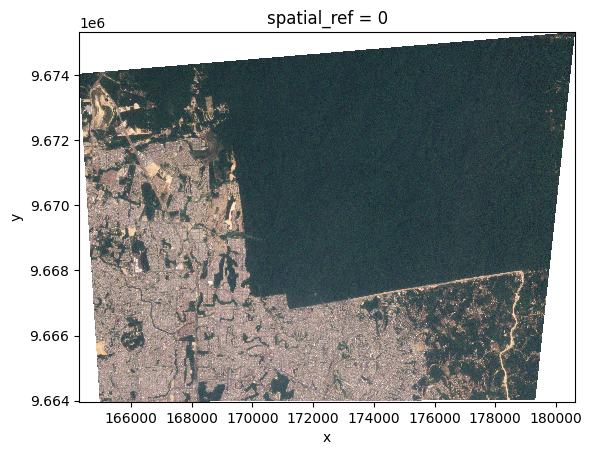

In [ ]:
rgb2 = rxr.open_rasterio('Manaus_Oct27_3_psscene_visual/composite.tif')
rgb2.rio.bounds()
# a = np.dstack((rgb2.isel(band=0)/rgb2.isel(band=0).values.max(),
#                rgb2.isel(band=1)/rgb2.isel(band=1).values.max(),
#                rgb2.isel(band=2)/rgb2.isel(band=2).values.max()))
# rgb2
# ep.plot_rgb(rgb2.values,rgb=[0,1,2]) #this works but doesn't have lat/long displayed
rgb2.plot.imshow()

In [ ]:
#NOW TO ACTUALLY PLOT!!!
'''
1. Import data
2. Set data crs (projection)
3. Convert (reproject) data to the same CRS
4. Get limits for axes (maybe clip data?)
5. Plot on top of each other
'''

rgb_crs = es.crs_check('manaus_oct27_rgb_psscene_visual/composite.tif')
cams_data_path = 'CAMS-GLOB-BIO_Glb_0.25x0.25_bio_isoprene_v3.1_monthly_2022.nc'
ds = xr.open_dataset(cams_data_path, decode_coords="all")
da = ds['emiss_bio']

#add in projection
d2 = da.rio.write_crs('EPSG:4326', inplace=True)
#reproject!!
d3 = d2.rio.reproject(mrgb_crs)
#get limits
lon_min, lat_min, lon_max, lat_max = rgb2.rio.bounds()

(164292.0, 180633.0, 9663966.0, 9675321.0)

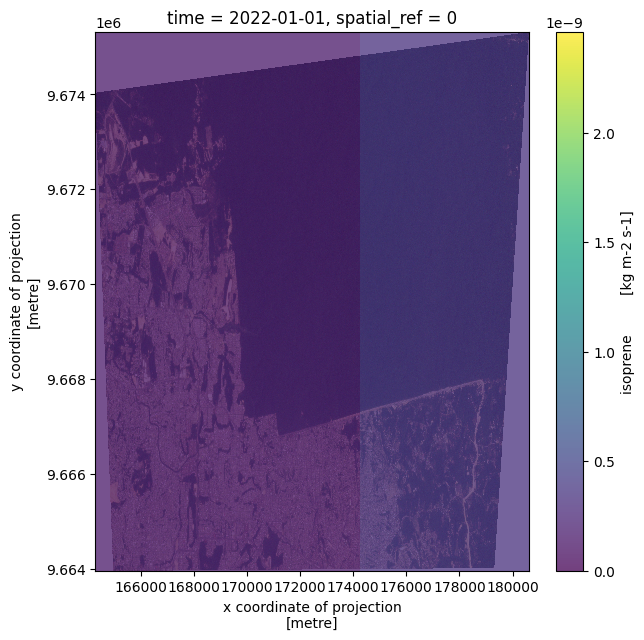

In [ ]:
rgb_crs1 = es.crs_check('manaus_oct27_rgb_psscene_visual/composite.tif')
cams_data_path = 'CAMS-GLOB-BIO_Glb_0.25x0.25_bio_isoprene_v3.1_monthly_2022.nc'
ds = xr.open_dataset(cams_data_path, decode_coords="all")
da = ds['emiss_bio']

#add in projection
d2 = da.rio.write_crs('EPSG:4326', inplace=True)
#reproject!!
d3 = d2.rio.reproject(rgb_crs1)
#get limits
lon_min, lat_min, lon_max, lat_max = rgb2.rio.bounds()

fig, ax = plt.subplots(figsize=(7,7))
rgb2.plot.imshow(ax=ax)
d3.isel(time=0).plot(ax=ax,alpha=.75)
ax.axis([lon_min, lon_max, lat_min, lat_max])

(164292.0, 180633.0, 9663966.0, 9675321.0)

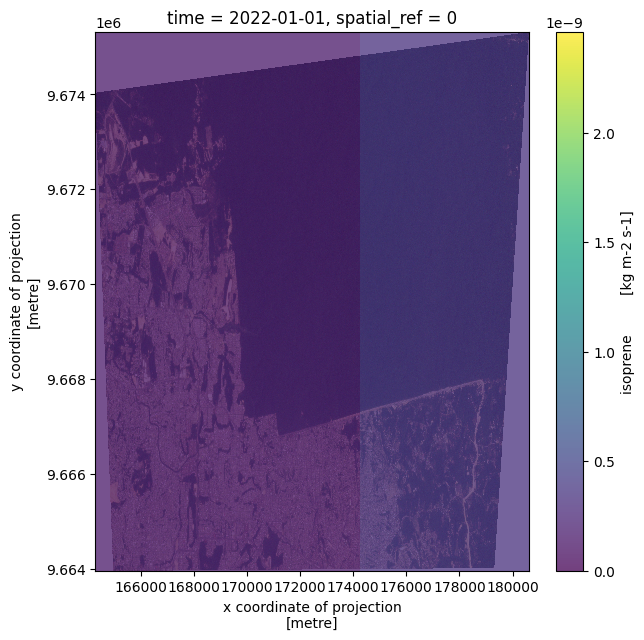

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
rgb2.plot.imshow(ax=ax)
d3.isel(time=0).plot(ax=ax,alpha=.75)
ax.axis([lon_min, lon_max, lat_min, lat_max])
#alpha here sets the translucence (from 0 - completely transparent to 1 completely opaque)